# Fashion Class Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fashion_train_df=pd.read_csv("fashion-mnist_train.csv",sep=',')
fashion_test_df=pd.read_csv("fashion-mnist_test.csv",sep=',')

### Visualizing our Dataset

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training=np.array(fashion_train_df,dtype='float32')
testing=np.array(fashion_test_df,dtype="float32")

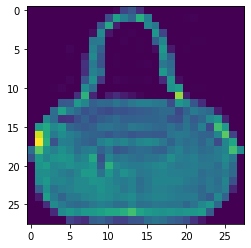

In [11]:
plt.imshow(training[20,1:].reshape(28,28))

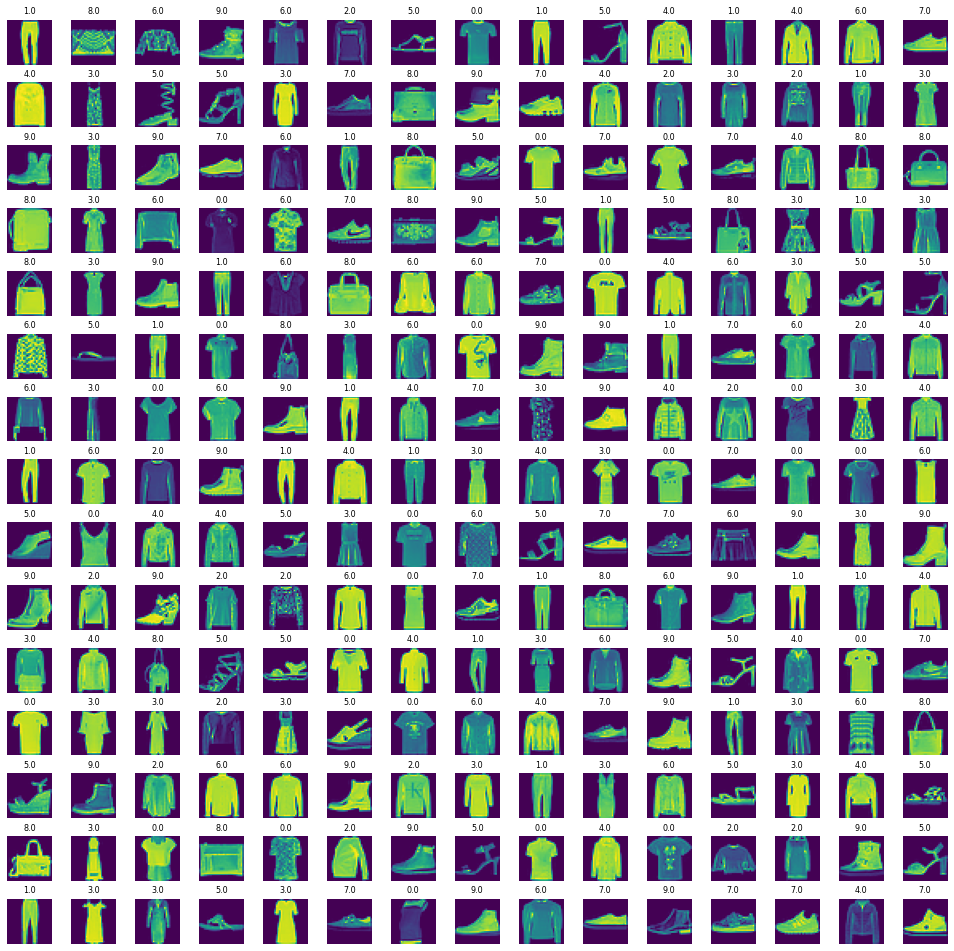

In [14]:
import random
W_grid=15
L_grid=15

fig,axes=plt.subplots(L_grid,W_grid,figsize=(17,17))
axes=axes.ravel() # To flatten the 15 x 15 matrix into 225 array

n_training=len(training)

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    #Read and Display an image with the selected Index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

### Training our Model

In [16]:
X_train=training[:,1:]/255
y_train=training[:,0]

In [17]:
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

### Evaluating the Model

In [19]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model=Sequential()

In [25]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [26]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
cnn_model.add(Flatten())

In [30]:
cnn_model.add(Dense(units=32,activation='relu'))
cnn_model.add(Dense(units=10,activation='sigmoid'))

In [31]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
cnn_model.fit(X_train,y_train,epochs=50,batch_size=512,verbose=1,validation_data=(X_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 2s 14ms/step - loss: 1.4143 - accuracy: 0.5649 - val_loss: 0.7789 - val_accuracy: 0.7293
Epoch 2/50
94/94 [==============================] - 2s 22ms/step - loss: 0.6886 - accuracy: 0.7529 - val_loss: 0.6255 - val_accuracy: 0.7765
Epoch 3/50
94/94 [==============================] - 2s 26ms/step - loss: 0.5948 - accuracy: 0.7852 - val_loss: 0.5807 - val_accuracy: 0.7885
Epoch 4/50
94/94 [==============================] - 2s 23ms/step - loss: 0.5499 - accuracy: 0.8026 - val_loss: 0.5407 - val_accuracy: 0.8037
Epoch 5/50
94/94 [==============================] - 2s 21ms/step - loss: 0.5213 - accuracy: 0.8107 - val_loss: 0.5089 - val_accuracy: 0.8171
Epoch 6/50
94/94 [==============================] - 2s 20ms/step - loss: 0.5001 - accuracy: 0.8196 - val_loss: 0.4909 - val_accuracy: 0.8259
Epoch 7/50
94/94 [==============================] - 2s 22ms/step - loss: 0.4816 - accuracy: 0.8265 - val_loss: 0.4801 - val_accuracy: 0.8271
Epoch 8/50
94

In [36]:
evaluation=cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8731
Test Accuracy : 0.873


In [53]:
predicted_classes=cnn_model.predict(X_test)
classes_x=np.argmax(predicted_classes,axis=1)

313/313 [==============================] - 0s 914us/step


In [54]:
classes_x

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

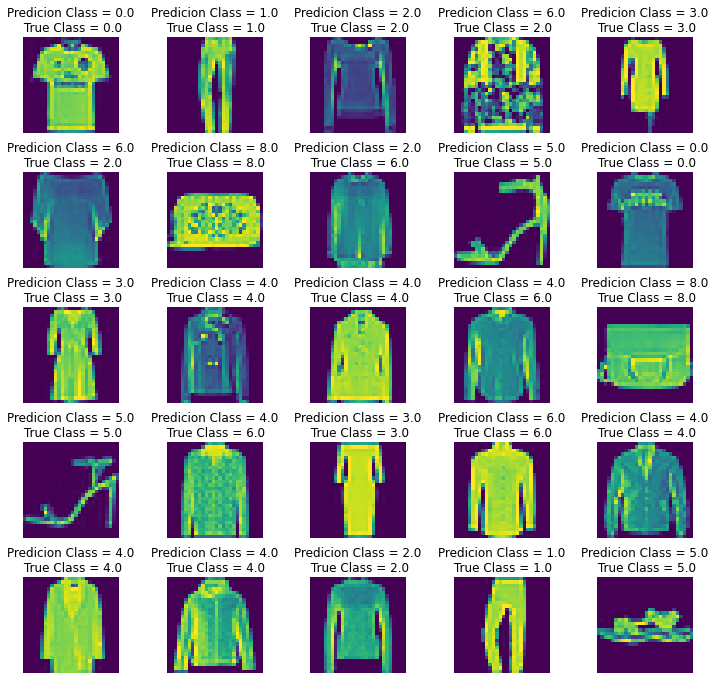

In [55]:
L=5
W=5
fig, axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicion Class = {:.1f}\n True Class = {:.1f}".format(classes_x[i],y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

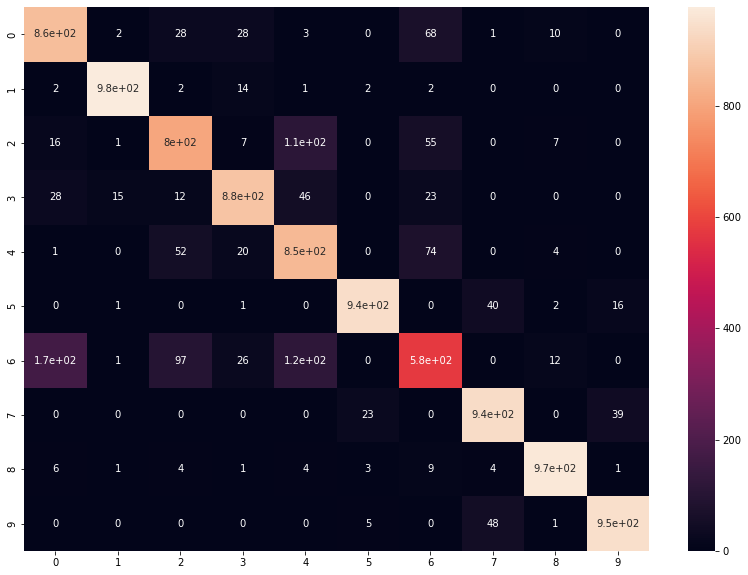

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,classes_x)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [57]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, classes_x, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.86      0.83      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.80      0.80      0.80      1000
     Class 3       0.90      0.88      0.89      1000
     Class 4       0.75      0.85      0.80      1000
     Class 5       0.97      0.94      0.95      1000
     Class 6       0.71      0.58      0.64      1000
     Class 7       0.91      0.94      0.92      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

